<a href="https://colab.research.google.com/github/gvosper25/GeorgiaVosper_3009ICT/blob/main/GeorgiaVosper_3009ICT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing and Visualization
-----
**Assignment Topic: Data Analysis on Car Advertisements**


Student Name: Georgia Vosper

SNumber: S5223182

# Data Import

In [180]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
car_data = pd.read_csv ('/content/drive/MyDrive/3009ICT-Assignment/car_dataset.csv')
sellers_data = pd.read_csv ('/content/drive/MyDrive/3009ICT-Assignment/seller_dataset.csv')

# Data Formatting

## a. Numerical Conversion

In [182]:
cols_to_clean = ['mileage','num_of_doors','seating_capacity','fuel_consumption','price (AUD)']
for col in cols_to_clean:
  car_data[col] = car_data[col].astype(str).str.extract(r'([\d.]+)').astype(float)

Run test

In [183]:
car_data [['mileage','num_of_doors','seating_capacity','fuel_consumption','price (AUD)']].head ()

,mileage,num_of_doors,seating_capacity,fuel_consumption,price (AUD)
0,0.0,2.0,2.0,100.0,10080.99411
1,0.0,5.0,7.0,10.0,161943.68050
2,0.0,5.0,8.0,100.0,35830.03930
3,0.0,5.0,5.0,100.0,30526.38376
4,0.0,5.0,8.0,100.0,34413.03209


## b. Engine Feature Split

In [184]:
car_data[['type_of_engine','engine_capacity']] =car_data ['engine'].str.extract(r'(\w+)\s*[\t]*\s*([\d.]+)\s*L')
car_data['engine_capacity'] =car_data ['engine_capacity'].astype(float)

Run test

In [185]:
car_data[['engine','type_of_engine','engine_capacity']].head()

,engine,type_of_engine,engine_capacity
0,Petrol\t1.0 L,Petrol,1.0
1,Petrol\t3.4 L,Petrol,3.4
2,Petrol\t2.0 L,Petrol,2.0
3,Petrol\t1.8 L,Petrol,1.8
4,Petrol\t2.0 L,Petrol,2.0


## c. Standardising Text Data

In [186]:
cols_to_lower = ['origin','condition','car_model','exterior_color','interior_color','type_of_engine','fuel_system','transmission','drive_type','brand','grade']
for col in cols_to_lower:
  car_data[col] = car_data[col].astype(str).str.lower()

Run test

In [187]:
car_data[['origin','condition','car_model','exterior_color','interior_color','type_of_engine','fuel_system','transmission','drive_type','brand','grade']].head()

,origin,condition,car_model,exterior_color,interior_color,type_of_engine,fuel_system,transmission,drive_type,brand,grade
0,domestic assembly,new car,truck,white,gray,petrol,nan,manual,rfd - rear-wheel drive,suzuki,super carry truck
1,imported,new car,suv,black,black,petrol,nan,automatic,awd - 4-wheel drive (awd),toyota,land cruiser
2,domestic assembly,new car,crossover,silver,brown,petrol,nan,automatic,rfd - rear-wheel drive,toyota,innova
3,imported,new car,suv,white,black,petrol,nan,automatic,fwd - front-wheel drive,toyota,corolla cross
4,domestic assembly,new car,crossover,silver,gray,petrol,nan,automatic,rfd - rear-wheel drive,toyota,innova


## d. Numerical Scaling

In [188]:
columns_to_scale = ['engine_capacity','num_of_doors','seating_capacity','fuel_consumption','price (AUD)']

scaler = MinMaxScaler()

import re

for col in columns_to_scale:
  clean_name = re.sub(r'[^a-zA-Z0-9]','_',col).lower()
  new_col = f'normalised_{clean_name}'
  car_data[new_col] = scaler.fit_transform(car_data[[col]])

Run test

In [189]:
car_data[['normalised_engine_capacity','normalised_price__aud_']].describe()

,normalised_engine_capacity,normalised_price__aud_
count,29285.000000,30652.000000
mean,0.154511,0.019597
std,0.064822,0.035946
min,0.000000,0.000000
25%,0.111111,0.007500
50%,0.150794,0.011407
75%,0.182540,0.018500
max,1.000000,1.000000


Save as a new CSV file

In [190]:
car_data.to_csv('/content/drive/MyDrive/3009ICT-Assignment/processed_car_dataset.csv', index = False)

# Data Exploration and Cleaning

## a. Statistics Computation

In [191]:
import numpy as np

columns = ['price (AUD)','mileage','year_of_manufacture']

for col in columns:
  print(f"\n---{col}---")
  print("Mean:", car_data[col].mean())
  print("Median:", car_data[col].median())
  print("Mode", car_data[col].mode().iloc[0])
  print("Standard Deviation:", car_data[col].std())
  print("Range", car_data[col].max()-car_data[col].min())


---price (AUD)---
Mean: 42843.16554304759
Median: 24939.32679
Mode 40485.92011
Standard Deviation: 78585.58399261319
Range 2186239.6858785423

---mileage---
Mean: 42.11447866370873
Median: 20.0
Mode 0.0
Standard Deviation: 74.87235716224309
Range 999.0

---year_of_manufacture---
Mean: 2017.320346178968
Median: 2019.0
Mode 2023.0
Standard Deviation: 5.3317724314591874
Range 33.0


## b. Outliers and Missing Values

### i) Make a copy of the data before cleaning

In [192]:
before_cleaning_rows = car_data.shape[0]

numeric_cols = car_data.select_dtypes(include = 'number').columns

for col in numeric_cols:
  Q1 = car_data[col].quantile(0.25)
  Q3 = car_data[col].quantile(0.75)
  IQR = Q3-Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  car_data = car_data[(car_data[col]>=lower)&(car_data[col]<=upper)]

after_cleaning_rows = car_data.shape[0]

print(f"Before cleaning: {before_cleaning_rows} rows")
print(f"After cleaning: {after_cleaning_rows} rows")
print(f"Rows removed: {before_cleaning_rows - after_cleaning_rows}")

Before cleaning: 30652 rows
After cleaning: 14610 rows
Rows removed: 16042


### ii) Check for missing values

In [193]:
car_data.isnull().sum()

,0
ad_id,0
origin,0
condition,0
car_model,0
mileage,0
exterior_color,0
interior_color,0
num_of_doors,0
seating_capacity,0
engine,0


Recheck

In [194]:
original_row_count = car_data.shape[0]
before_cleaning_rows = original_row_count
after_cleaning_rows = car_data.shape[0]

print(f"Before cleaning: {before_cleaning_rows}")
print(f"After cleaning: {after_cleaning_rows}")
print(f"Rows removed: {before_cleaning_rows - after_cleaning_rows}")

Before cleaning: 14610
After cleaning: 14610
Rows removed: 0


# Data Storage

## a. Cars Table

In [195]:
df = car_data.rename(columns = {"price (AUD)":"price",})[["ad_id","car_name","origin","condition","exterior_color","car_model","year_of_manufacture","transmission","price","drive_type"]].copy()

conn = sqlite3.connect("car_database.db"); cur = conn.cursor()
cur.executescript("""
DROP TABLE IF EXISTS Cars;
CREATE TABLE Cars(
  ad_id INTEGER PRIMARY KEY,
  car_name VARCHAR (225),
  origin VARCHAR (225),
  condition VARCHAR (225),
  exterior_color VARCHAR (255),
  car_model VARCHAR (255),
  year_of_manufacture VARCHAR (255),
  transmission VARCHAR (255),
  price INTEGER,
  drive_type VARCHAR (255)
);
""")
df.to_sql("Cars",conn, if_exists="append", index=False)
conn.commit()

Results

In [196]:
pd.read_sql_query("SELECT * FROM Cars LIMIT 5", conn)

,ad_id,car_name,origin,condition,exterior_color,car_model,year_of_manufacture,transmission,price,drive_type
0,4664789,Toyota Yaris 1.5G 2016,imported,used car,white,hatchback,2016.0,automatic,17368.45973,fwd - front-wheel drive
1,4664930,Chevrolet Colorado LTZ 2.5L 4x4 AT 2019,imported,used car,yellow,4x4,2019.0,automatic,26923.13687,4wd - four-wheel drive (4wd)
2,4665042,Hyundai Tucson 2.0 ATH 2015,imported,used car,white,crossover,2015.0,automatic,26680.22135,fwd - front-wheel drive
3,4665290,Mazda CX5 2.0 AT 2017,domestic assembly,used car,white,suv,2017.0,automatic,26720.70727,fwd - front-wheel drive
4,4665362,VinFast Lux A 2.0 Advanced 2022 car,domestic assembly,new car,red,sedan,2022.0,automatic,33967.68697,rfd - rear-wheel drive


## b. Sellers Table

In [197]:
sellers = (pd.read_csv("/content/drive/MyDrive/3009ICT-Assignment/seller_dataset.csv", usecols = ["ad_id","name"]).rename(columns={"name":"seller_name"}))

conn = sqlite3.connect("car_database.db")
cur = conn.cursor()
cur.executescript("""
DROP TABLE IF EXISTS Sellers;
CREATE TABLE Sellers(
  ad_id INTEGER PRIMARY KEY,
  seller_name TEXT);""")
sellers.to_sql("Sellers", conn, if_exists="append", index=False)

30652

Results

In [198]:
display(pd.read_sql_query("SELECT * FROM Sellers LIMIT 5;", conn))
conn.close()

,ad_id,seller_name
0,17042,Suzuki - Sydney
1,53794,Toyota - Melbourne
2,73954,Toyota - Brisbane
3,74150,Toyota - Perth
4,87573,Toyota - Adelaide


## c. Query

In [199]:
conn = sqlite3.connect("car_database.db")

q = """
SELECT
  c.ad_id,
  c.car_name AS "Cars.car_name",
  c.price AS "Cars.Price",
  s.seller_name As "Sellers.seller_name"
  FROM Cars c
  JOIN Sellers s USING (ad_id)
  LIMIT 10;
  """
display(pd.read_sql_query(q, conn))
conn.close()

,ad_id,Cars.car_name,Cars.Price,Sellers.seller_name
0,4664789,Toyota Yaris 1.5G 2016,17368.45973,Toyota - Wollongong
1,4664930,Chevrolet Colorado LTZ 2.5L 4x4 AT 2019,26923.13687,Chevrolet - Geelong
2,4665042,Hyundai Tucson 2.0 ATH 2015,26680.22135,Hyundai - Townsville
3,4665290,Mazda CX5 2.0 AT 2017,26720.70727,Mazda - Burnie
4,4665362,VinFast Lux A 2.0 Advanced 2022 car,33967.68697,VinFast - Bunbury
5,4665368,VinFast Lux A 2.0 Advanced 2022 car,33967.68697,VinFast - Gladstone
6,4665404,VinFast Lux A 2.0 Premium 2022 Car,38056.76491,VinFast - Hervey Bay
7,4665490,Ford Ranger XLS 2.0L 4x2 MT 2023,25910.98887,Ford - Alice Springs
8,4665511,Ford Ranger XLS 2.0L 4x2 MT 2023,25910.98887,Ford - Mount Gambier
9,4665517,Ford Ranger XLS 2.0L 4x2 AT 2023,26720.70727,Ford - Kalgoorlie


# Data Visualisation

## i. Milage and Price

In [200]:
car_data.columns = car_data.columns.str.strip()

lower_map = {c.lower(): c for c in car_data.columns}
candidates = ["price", "price (aud)", "price(aud)"]
src = next ((lower_map[k] for k in candidates if k in lower_map),None)
assert src is not None, f"No price-like column found. Columns: {list(car_data.columns)}"

car_data["price"] = pd.to_numeric(car_data[src], errors="coerce")

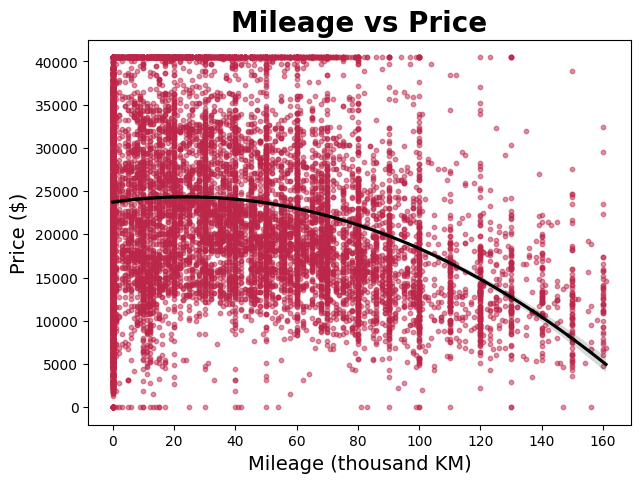

In [201]:
plt.figure (figsize = (7,5))

sns.regplot(data = car_data,x='mileage',y='price', scatter_kws={'s':10,'alpha':0.5,'color':'#BB2649'}, order=2,line_kws={"color":"black"})

plt.title("Mileage vs Price", fontsize=20, weight='bold')
plt.xlabel ("Mileage (thousand KM)", fontsize=14)
plt.ylabel ("Price ($)", fontsize=14)

plt.show()

Observation:
From the scatter plot, it can be seen that cars with a lower mileage usually cost more. As the mileage goes up the price tends to drop. Even though there is a lot of variation the overall trend shows that the higher the mileage typicaly means the cheaper the car.

## ii. Trends of car prices over the year of manufacture

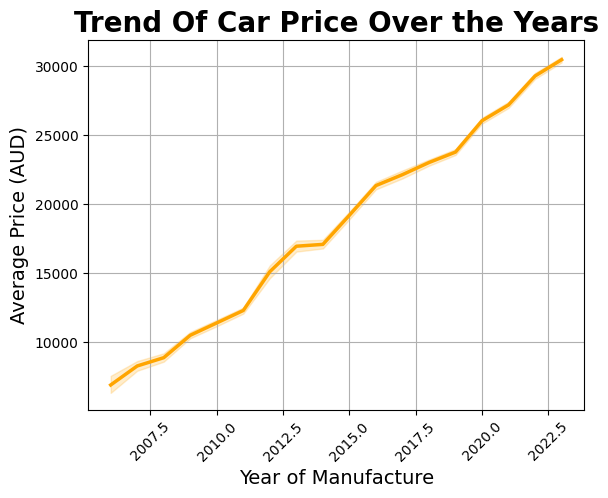

In [202]:

sns.lineplot(data=car_data, x= 'year_of_manufacture',y='price',estimator='mean', errorbar=('ci',68), color='orange', linewidth=2.5)

plt.title("Trend Of Car Price Over the Years", fontsize = 20, weight ='bold')
plt.xlabel("Year of Manufacture",fontsize = 14)
plt.ylabel("Average Price (AUD)",fontsize = 14)


plt.grid (True)
plt.xticks(rotation=45)


plt.show()

Observation: The line chart shows a clear upward trend in the average car prices from around 2006 to 2023. This suggests that newer cars tend to be more expensive. The price increases more rapidy after 2011, with a sharper increase from 2019 onwards.

## iii. Average prices among diffrent car models

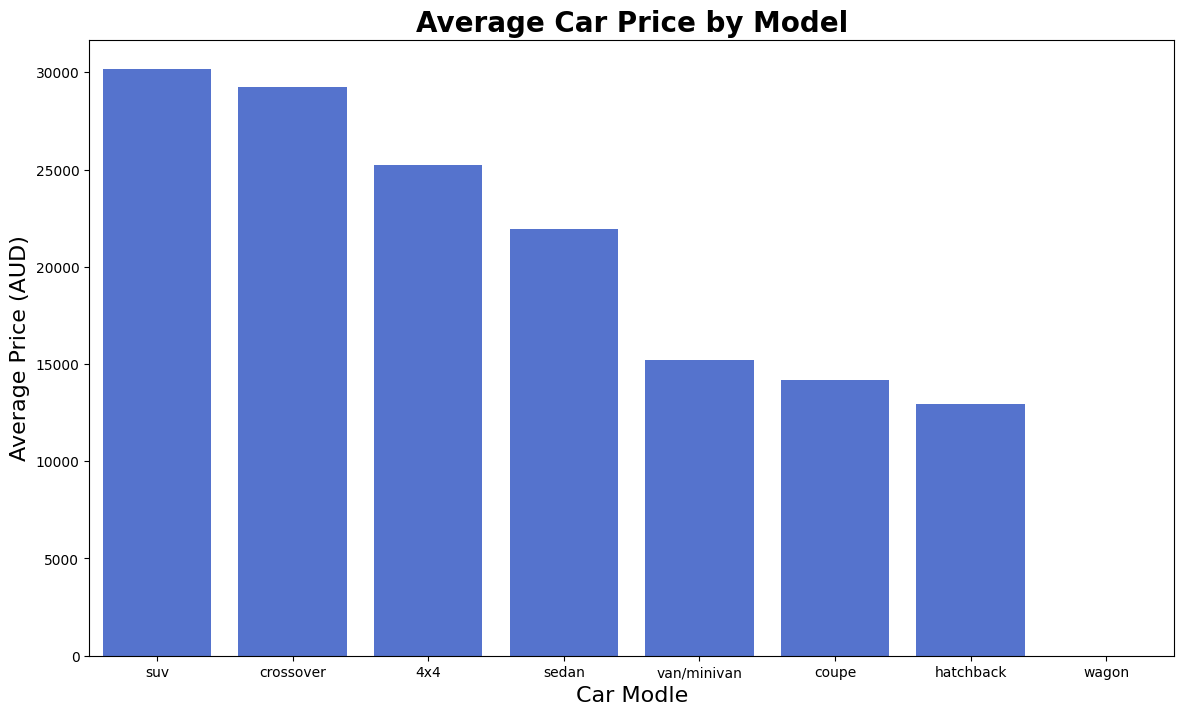

In [203]:
avg_prices=car_data.groupby('car_model')['price (AUD)'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14,8))
sns.barplot(data=avg_prices, x='car_model', y='price (AUD)', color='royalblue')

plt.title("Average Car Price by Model", fontsize=20,weight ='bold')
plt.xlabel ("Car Modle", fontsize=16)
plt.ylabel("Average Price (AUD)", fontsize=16)

plt.show()

Observation: SUVs and crossovers have the highest average price, posibly due to their size and popularity. hatchbacks and coupes are the most affordable. This graph suggests that car models sugnifficantly affects the price with larger vechiles costing more.

## iv. Distribution of engine capacity

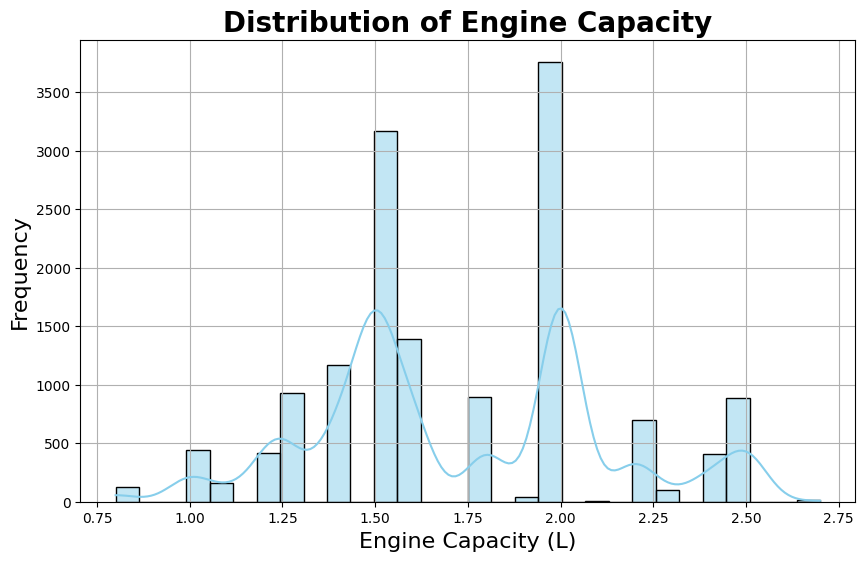

In [204]:
plt.figure(figsize=(10,6))
sns.histplot(data=car_data,x='engine_capacity', bins=30, kde=True, color='skyblue')

plt.title('Distribution of Engine Capacity', fontsize=20, fontweight='bold')
plt.xlabel('Engine Capacity (L)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(True)

plt.show()

Observation:
Most cars have engine capacities around 1.5L and 2.0L, shown by the two peaks in the graph. The distribution is bimodal with less vechicles have much smaller or larger engine sizes.

## v. Exterior colours

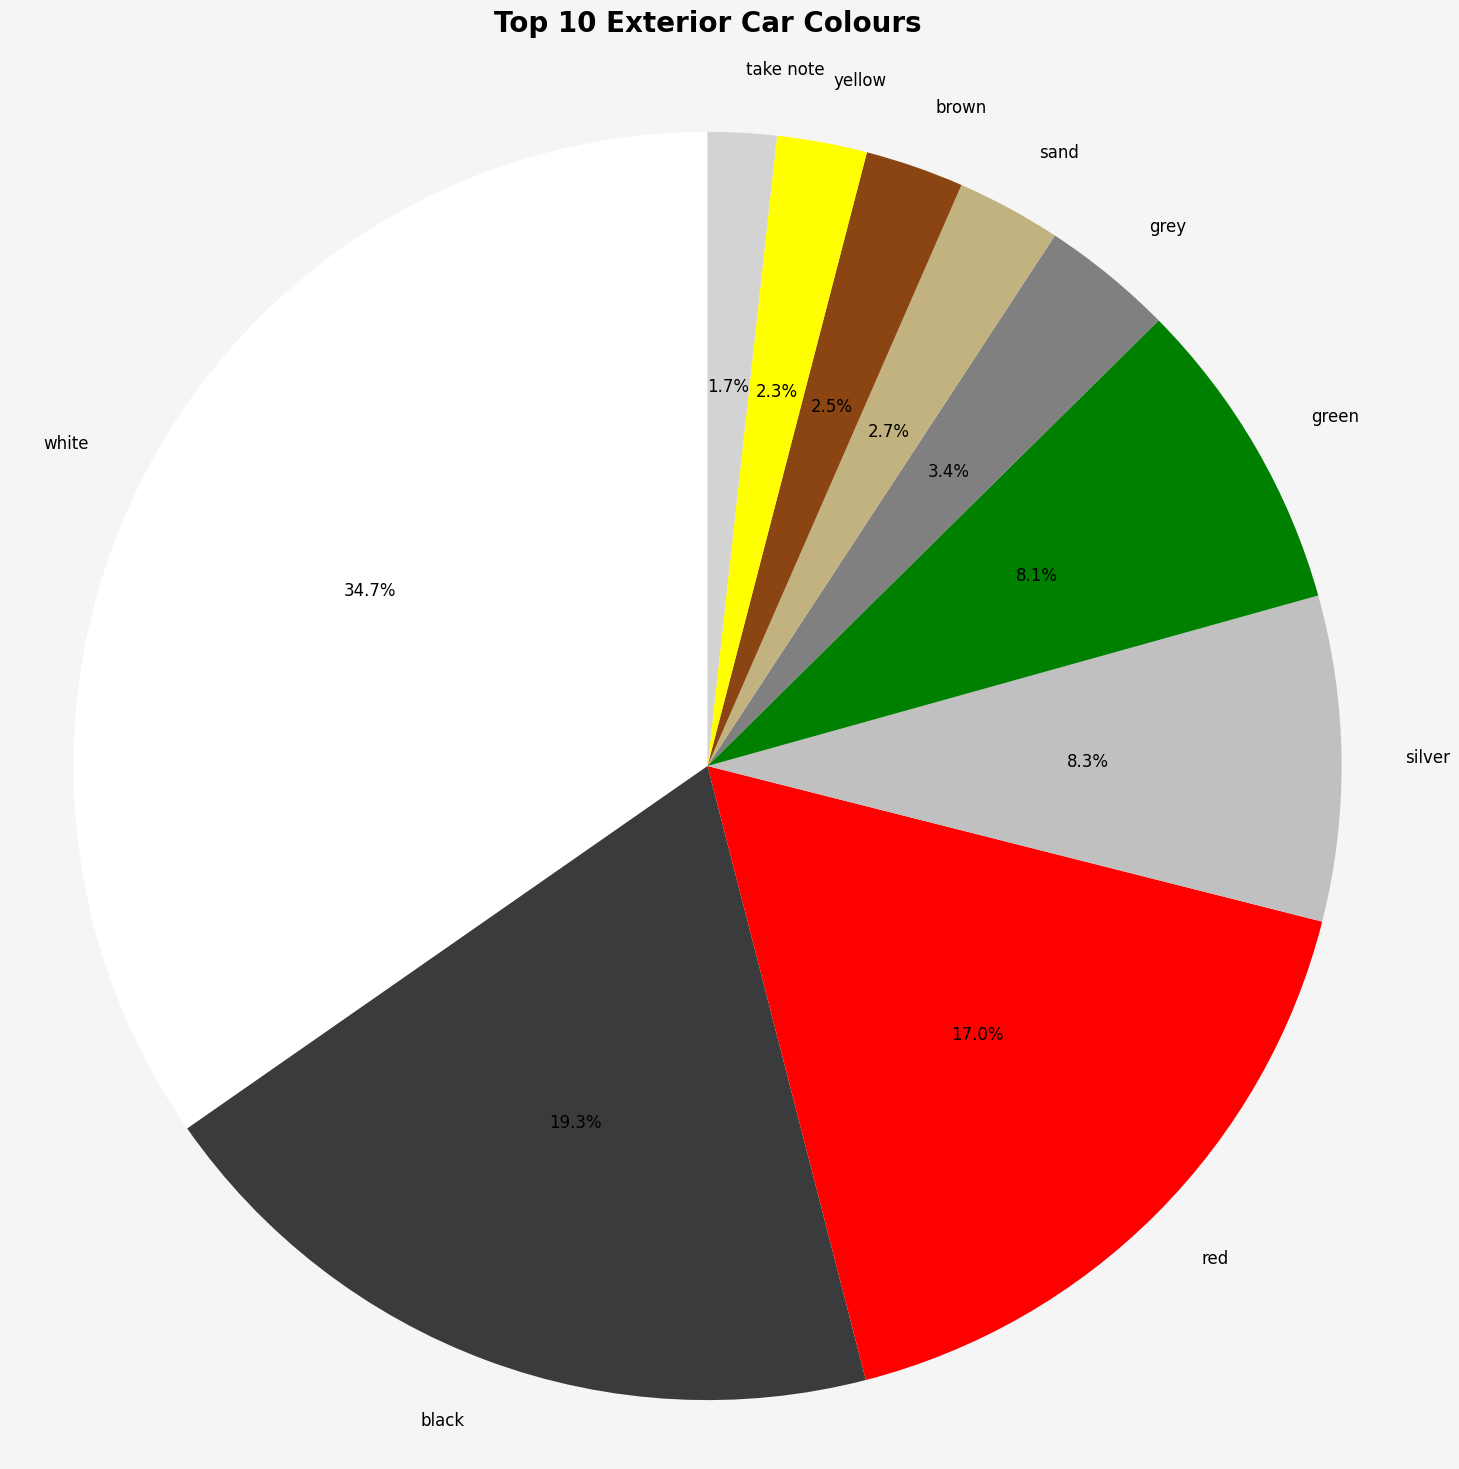

In [205]:
 top_colors=car_data['exterior_color'].value_counts().head(10)

 labels=top_colors.index
 sizes=top_colors.values


 color_mapping={'white':'white','black':'#3A3B3C','silver':'silver','green':'green','grey':'grey','sand':'#C2B280','brown':'saddlebrown','yellow':'yellow','take note':'lightgrey','red':'red'}

 colors=[color_mapping.get(label,'lightgrey') for label in labels]

 plt.figure(figsize=(18,18), facecolor='#f5f5f5')
 plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,textprops={'fontsize':12})

 plt.title("Top 10 Exterior Car Colours", fontsize=20, fontweight='bold',pad=30)

 plt.axis('equal')
 plt.show()

Observation: The most common color is white making up to nearly 35% of the top 10 colours followed by black then red. this show that people prefer the standard colours of ars vs some more bolder choices.